In [1]:
import pandas as pd

import matplotlib.pyplot as plt

In [4]:
dataset_location = "src/data/ai_job_market.csv"

df = pd.read_csv(dataset_location)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   job_id            2000 non-null   int64 
 1   company_name      2000 non-null   object
 2   industry          2000 non-null   object
 3   job_title         2000 non-null   object
 4   skills_required   2000 non-null   object
 5   experience_level  2000 non-null   object
 6   employment_type   2000 non-null   object
 7   location          2000 non-null   object
 8   salary_range_usd  2000 non-null   object
 9   posted_date       2000 non-null   object
 10  company_size      2000 non-null   object
 11  tools_preferred   2000 non-null   object
dtypes: int64(1), object(11)
memory usage: 187.6+ KB


In [6]:
df.head(5)

,job_id,company_name,industry,job_title,skills_required,experience_level,employment_type,location,salary_range_usd,posted_date,company_size,tools_preferred
0,1,Foster and Sons,Healthcare,Data Analyst,"NumPy, Reinforcement Learning, PyTorch, Scikit...",Mid,Full-time,"Tracybury, AR",92860-109598,2025-08-20,Large,"KDB+, LangChain"
1,2,"Boyd, Myers and Ramirez",Tech,Computer Vision Engineer,"Scikit-learn, CUDA, SQL, Pandas",Senior,Full-time,"Lake Scott, CU",78523-144875,2024-03-22,Large,"FastAPI, KDB+, TensorFlow"
2,3,King Inc,Tech,Quant Researcher,"MLflow, FastAPI, Azure, PyTorch, SQL, GCP",Entry,Full-time,"East Paige, CM",124496-217204,2025-09-18,Large,"BigQuery, PyTorch, Scikit-learn"
3,4,"Cooper, Archer and Lynch",Tech,AI Product Manager,"Scikit-learn, C++, Pandas, LangChain, AWS, R",Mid,Full-time,"Perezview, FI",50908-123743,2024-05-08,Large,"TensorFlow, BigQuery, MLflow"
4,5,Hall LLC,Finance,Data Scientist,"Excel, Keras, SQL, Hugging Face",Senior,Contract,"North Desireeland, NE",98694-135413,2025-02-24,Large,"PyTorch, LangChain"


In [7]:
from sklearn.preprocessing import OneHotEncoder

In [8]:
def OneHotEncoders_for_multiple_data(x):
    set_container = set()
    
    #this is for adding a 
    def adder(x=[]):
        for i in x:
            #too much hassle, so i just make a condition
            if(i[0] == ' '):
                i = i[1:]
            set_container.add(i)
    
    seperator = lambda x: str.split(x, sep=",")
    
    x = x.map(arg=seperator)
    
    x.map(adder)
    
    template = dict(zip(set_container,[0 for i in range(len(set_container))]))
    
    result_container = []
    
    def initiated_counter(x):
        initiated = template.copy()
        for i in x:
            #too much hassle, so i just make a condition
            if(i[0] == ' '):
                i = i[1:]
            if(i in initiated):
                initiated[i] += 1
        return list(initiated.values())
    
    x.map(arg=(
        lambda x: result_container.append(
            initiated_counter(x)
        )
    ))
    
    return pd.DataFrame(result_container, columns=list(set_container))

In [9]:
skill_required = df["skills_required"].copy()
skill_required = OneHotEncoders_for_multiple_data(skill_required)

tools_preferred = df["tools_preferred"].copy()
tools_preferred = OneHotEncoders_for_multiple_data(tools_preferred)

industry = df["industry"].copy()
industry = OneHotEncoders_for_multiple_data(industry)

job_title = df["job_title"].copy()
job_title = OneHotEncoders_for_multiple_data(job_title)

In [10]:
#for this data, we want to seperate the data first, so we can decide what
#we gonna do with this
salary_range_usd = df["salary_range_usd"].copy()
salary_range_usd = pd.DataFrame(salary_range_usd.map(
    arg=lambda x: [int(i) for i in str.split(x, sep="-")]
).to_list(), columns=["min_range_salary", "max_range_slary"])

In [11]:
used_df = df.copy()

#because experience level has hirarchy (Entry level obliviously below mid, etc)
#so the treatment for this data is label encoding
experience_level_hirarchy = {"Entry":0, "Mid":1, "Senior":2}

#its also same for company size
company_size_hirarchy = {'Startup':0, 'Mid':1, 'Large':2}

#same
#this hirarchy is unique, because the hirarchy is based on preferability (because who doesnt want remote jobs)
employment_type_hirarchy = {'Internship':0,'Contract':1, 'Full-time':2, 'Remote':3}

#replace the experience_level feature to df
used_df["experience_level"] = used_df["experience_level"].map(experience_level_hirarchy)

#also do it for company_size_hirarchy
used_df["company_size"] = used_df["company_size"].map(company_size_hirarchy)

#same
used_df["employment_type"] = used_df["employment_type"].map(employment_type_hirarchy)

In [12]:
#we change the posted_date feature to datetime type for convinient
used_df["posted_date"] = pd.to_datetime(used_df["posted_date"], format="%Y-%m-%d")

In [13]:
#dropped because we want to do seperate things for these data, so we drop it first
dropped_columns = [
    "skills_required", "tools_preferred", "industry", 
    "job_title", "salary_range_usd", 
    "company_name", "location", "posted_date", "job_id"]

used_df.drop(columns=dropped_columns, inplace=True)

In [14]:
used_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   experience_level  2000 non-null   int64
 1   employment_type   2000 non-null   int64
 2   company_size      2000 non-null   int64
dtypes: int64(3)
memory usage: 47.0 KB


In [15]:
used_df

,experience_level,employment_type,company_size
0,1,2,2
1,2,2,2
2,0,2,2
3,1,2,2
4,2,1,2
...,...,...,...
1995,2,0,2
1996,1,3,2
1997,0,1,2
1998,2,1,2


# PCA to all OneHotEncoding data

In [16]:
from sklearn.decomposition import PCA

In [17]:
list_data = [skill_required, tools_preferred, industry, job_title]
column_name = ["skill_required", "tools_preferred", "industry", "job_title"]
pca_list = []

for i in range(len(list_data)):
    decompose = PCA(n_components=1, random_state=43)
    list_data[i] = pd.DataFrame(
        decompose.fit_transform(list_data[i]), columns=["pca_" + column_name[i]]
    )
    pca_list.append(decompose)

In [18]:
used_df

,experience_level,employment_type,company_size
0,1,2,2
1,2,2,2
2,0,2,2
3,1,2,2
4,2,1,2
...,...,...,...
1995,2,0,2
1996,1,3,2
1997,0,1,2
1998,2,1,2


In [19]:
def combine_dataframe(base=pd.DataFrame([]), combined=pd.DataFrame([]), axis=1):
    return pd.concat([base,combined],axis=axis)

for i in list_data:
    used_df = combine_dataframe(used_df, i)

used_df = combine_dataframe(used_df, salary_range_usd)

In [20]:
intership_data = used_df[used_df["employment_type"] == 0].copy()

contract_data = used_df[used_df["employment_type"] == 1].copy()

full_time_data = used_df[used_df["employment_type"] == 2].copy()

remote_data = used_df[used_df["employment_type"] == 3].copy()

employment_datas = [intership_data, contract_data, full_time_data, remote_data]

index_data_list = []

for i in employment_datas:
    index_data_list.append(i.index)

# kmeans model implementation

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [22]:
scaler_list = []

index = 0

for i in employment_datas:
    scaler = StandardScaler()
    employment_datas[index] = scaler.fit_transform(i.drop(columns=["employment_type"]))
    scaler_list.append(scaler)
    index += 1

In [23]:
kmeans_model = []

for i in employment_datas:
    model = KMeans(5)
    model.fit(i)
    kmeans_model.append(model)

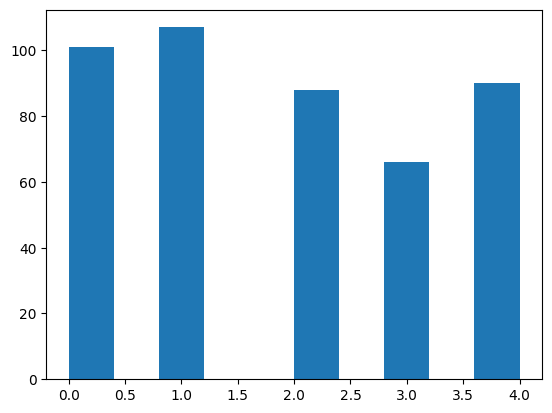

In [24]:
plt.hist(kmeans_model[3].predict(employment_datas[3]))
plt.show()

In [25]:
result = df.copy()

In [26]:
result_respect_to_employment_level = []

index = 0

for i in employment_datas:
    result_respect_to_employment_level.append(kmeans_model[index].predict(
        i
    ))
    index += 1

In [27]:
pd.DataFrame(result_respect_to_employment_level[0], columns=["label"], index=index_data_list[0])

,label
7,4
8,1
10,4
17,3
19,0
...,...
1979,4
1987,0
1989,1
1993,1


In [28]:
result_on_each_employment_level = []

employment_type_list = [i for i in employment_type_hirarchy.keys()]

index = 0

for i in result_respect_to_employment_level:
    result_on_each_employment_level.append(
        combine_dataframe(
            result[result["employment_type"] == employment_type_list[index]],
            pd.DataFrame(i, columns=["label"], index=index_data_list[index])
        , axis=1)
    )
    index += 1

In [35]:
import numpy as np
from scipy.spatial.distance import cdist

In [39]:
employment_datas[1]

array([[ 1.35990711,  1.23209194, -2.0415168 , ..., -0.20735707,
         0.1371136 , -0.3199863 ],
       [-1.14447628, -1.23740268,  0.52954923, ...,  2.32848233,
         0.92115017,  0.5410801 ],
       [-1.14447628, -1.23740268, -0.86350305, ...,  2.32848233,
        -0.7025756 ,  0.28292615],
       ...,
       [ 0.10771541, -1.23740268,  0.30896935, ..., -0.17625574,
        -1.51840072, -1.92218205],
       [-1.14447628,  1.23209194, -1.97665089, ...,  2.32848233,
         1.23504307,  0.71030129],
       [ 1.35990711,  1.23209194, -0.5031217 , ..., -0.31677587,
        -0.96099735, -1.53881226]])

In [52]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = np.arange(1, 10)

X = employment_datas[2]

for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42).fit(X)
    
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)**2) / X.shape[0])
    
    inertias.append(kmeanModel.inertia_)
    
    mapping1[k] = distortions[-1]
    mapping2[k] = inertias[-1]

Distortion values:
1 : 8.000000000000004
2 : 6.705500372081638
3 : 5.924281091505924
4 : 5.502793588678066
5 : 4.929836947026774
6 : 4.689299123960899
7 : 4.476290105453027
8 : 4.273595303354132
9 : 4.147106342460714


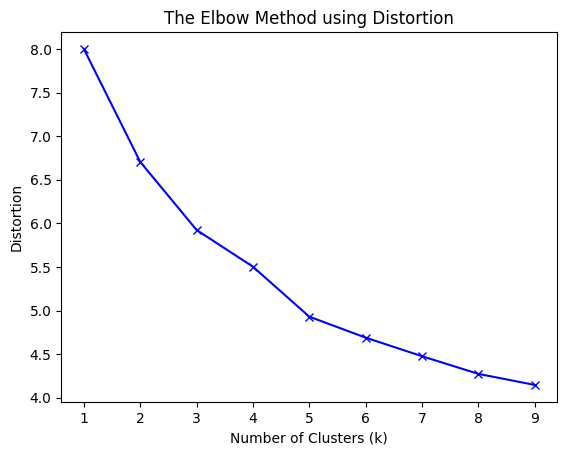

In [53]:
print("Distortion values:")
for key, val in mapping1.items():
    print(f'{key} : {val}')

plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [564]:
result_on_each_employment_level[0]

,job_id,company_name,industry,job_title,skills_required,experience_level,employment_type,location,salary_range_usd,posted_date,company_size,tools_preferred,label
7,8,Mullins Ltd,Education,Data Scientist,"Excel, SQL, Flask",Entry,Internship,"Port Hailey, RU",63032-82144,2024-08-14,Large,BigQuery,2
8,9,Aguilar PLC,Healthcare,ML Engineer,"Pandas, LangChain, GCP, Azure",Entry,Internship,"Butlermouth, GB",134239-188504,2025-09-15,Large,"Scikit-learn, LangChain, BigQuery",1
10,11,Vaughan-Ortiz,Tech,Data Scientist,"Keras, MLflow, Reinforcement Learning",Entry,Internship,"New Angelatown, LU",99964-125971,2024-01-10,Large,"LangChain, BigQuery, Scikit-learn",2
17,18,Smith-Moore,Automotive,AI Product Manager,"Excel, MLflow, Hugging Face, Flask, Power BI",Entry,Internship,"Blevinsburgh, VU",138184-192857,2024-04-29,Startup,BigQuery,0
19,20,Gates LLC,E-commerce,ML Engineer,"R, CUDA, Power BI, AWS",Mid,Internship,"Stevenhaven, BW",115578-207180,2024-08-29,Large,MLflow,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1979,1980,Cook-Fowler,Finance,AI Product Manager,"FastAPI, Keras, Flask, AWS, GCP",Mid,Internship,"Kevinborough, SE",72541-113000,2024-03-18,Mid,"MLflow, LangChain",2
1987,1988,"Solis, Peters and Walsh",Tech,ML Engineer,"AWS, Azure, Python, R, Scikit-learn, GCP",Senior,Internship,"Jennifermouth, HR",75187-168220,2024-10-12,Large,"BigQuery, TensorFlow, LangChain",3
1989,1990,"Hall, Barber and Young",Tech,Data Scientist,"AWS, Azure, C++, LangChain, Python, Flask",Entry,Internship,"Williamshaven, NI",101664-150656,2025-01-09,Startup,"KDB+, BigQuery",1
1993,1994,Moran-Brown,Tech,NLP Engineer,"Azure, C++, Keras",Senior,Internship,"Brownburgh, WS",149301-234157,2025-01-08,Mid,LangChain,1


In [574]:
result_on_each_employment_level[1][result_on_each_employment_level[1]["label"] == 4]

,job_id,company_name,industry,job_title,skills_required,experience_level,employment_type,location,salary_range_usd,posted_date,company_size,tools_preferred,label
4,5,Hall LLC,Finance,Data Scientist,"Excel, Keras, SQL, Hugging Face",Senior,Contract,"North Desireeland, NE",98694-135413,2025-02-24,Large,"PyTorch, LangChain",4
43,44,"Thomas, Waller and Kelly",Education,Quant Researcher,"Hugging Face, Flask, TensorFlow, Excel, SQL",Entry,Contract,"South Jeremiah, MX",65214-151832,2025-03-11,Large,"TensorFlow, LangChain, PyTorch",4
65,66,"Harris, Porter and Walter",Retail,AI Researcher,"C++, Reinforcement Learning, NumPy, Azure, MLf...",Mid,Contract,"Port Kristenmouth, SA",106117-199125,2023-12-19,Large,"FastAPI, KDB+",4
86,87,Ward-Allen,Education,Quant Researcher,"C++, Power BI, NumPy",Mid,Contract,"Jeffreyburgh, SC",98118-167073,2024-09-10,Large,"LangChain, BigQuery",4
99,100,"Farmer, Leach and Norris",Retail,Computer Vision Engineer,"Keras, Power BI, MLflow, AWS",Mid,Contract,"Williamsbury, DO",126422-179630,2025-09-03,Mid,TensorFlow,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,1880,Kelly-Cline,Education,Data Scientist,"PyTorch, Power BI, Scikit-learn, Flask, NumPy,...",Mid,Contract,"Port Caroline, NI",130051-206373,2024-04-11,Large,"FastAPI, MLflow",4
1881,1882,"Kennedy, Lopez and Bell",Retail,ML Engineer,"Python, LangChain, SQL, AWS, GCP, Power BI",Entry,Contract,"New Michael, TW",94087-155660,2023-12-29,Mid,TensorFlow,4
1941,1942,"Robinson, Mcdowell and Robinson",E-commerce,NLP Engineer,"Excel, FastAPI, Keras, PyTorch, Azure, Flask",Entry,Contract,"South Elizabeth, GE",76728-116756,2024-05-12,Large,"PyTorch, TensorFlow, MLflow",4
1975,1976,Horton and Sons,Education,Computer Vision Engineer,"Scikit-learn, Keras, NumPy, Reinforcement Lear...",Senior,Contract,"Nicholasmouth, BD",117323-142634,2025-04-20,Large,"LangChain, PyTorch",4


In [566]:
result_on_each_employment_level[2]

,job_id,company_name,industry,job_title,skills_required,experience_level,employment_type,location,salary_range_usd,posted_date,company_size,tools_preferred,label
0,1,Foster and Sons,Healthcare,Data Analyst,"NumPy, Reinforcement Learning, PyTorch, Scikit...",Mid,Full-time,"Tracybury, AR",92860-109598,2025-08-20,Large,"KDB+, LangChain",3
1,2,"Boyd, Myers and Ramirez",Tech,Computer Vision Engineer,"Scikit-learn, CUDA, SQL, Pandas",Senior,Full-time,"Lake Scott, CU",78523-144875,2024-03-22,Large,"FastAPI, KDB+, TensorFlow",4
2,3,King Inc,Tech,Quant Researcher,"MLflow, FastAPI, Azure, PyTorch, SQL, GCP",Entry,Full-time,"East Paige, CM",124496-217204,2025-09-18,Large,"BigQuery, PyTorch, Scikit-learn",0
3,4,"Cooper, Archer and Lynch",Tech,AI Product Manager,"Scikit-learn, C++, Pandas, LangChain, AWS, R",Mid,Full-time,"Perezview, FI",50908-123743,2024-05-08,Large,"TensorFlow, BigQuery, MLflow",4
6,7,Matthews-Moses,Automotive,Data Analyst,"Python, Flask, Scikit-learn, GCP",Mid,Full-time,"West Shawn, LR",70575-88594,2024-12-23,Large,"PyTorch, MLflow",3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,1984,Ball-Kelly,Automotive,AI Researcher,"Keras, Excel, R",Senior,Full-time,"North Melissashire, LA",126658-206526,2024-08-06,Startup,"BigQuery, MLflow, FastAPI",2
1985,1986,"Jackson, Anthony and Woods",Finance,Data Analyst,"Reinforcement Learning, LangChain, MLflow, Hug...",Entry,Full-time,"Danielview, SA",138115-160417,2024-10-30,Startup,MLflow,3
1990,1991,Sanchez Group,Finance,Computer Vision Engineer,"C++, Python, Keras, Scikit-learn",Entry,Full-time,"Brownton, LB",129971-201877,2024-12-12,Startup,"FastAPI, PyTorch",0
1994,1995,Williams-Curtis,Education,AI Researcher,"Scikit-learn, Azure, FastAPI, C++",Mid,Full-time,"Melissaside, ZA",63305-152463,2025-01-30,Startup,"MLflow, LangChain",1


In [567]:
result_on_each_employment_level[3]

,job_id,company_name,industry,job_title,skills_required,experience_level,employment_type,location,salary_range_usd,posted_date,company_size,tools_preferred,label
5,6,Ellis PLC,E-commerce,AI Product Manager,"GCP, Excel, Scikit-learn, MLflow",Senior,Remote,"South Kevin, TZ",92632-180718,2025-08-07,Large,"PyTorch, TensorFlow, FastAPI",3
14,15,Rogers Ltd,Education,NLP Engineer,"Pandas, CUDA, NumPy, FastAPI",Mid,Remote,"New Katieborough, FJ",129842-216741,2024-07-08,Large,FastAPI,4
15,16,Wright-Evans,Automotive,NLP Engineer,"Hugging Face, Scikit-learn, Reinforcement Lear...",Senior,Remote,"Stephaniechester, LU",124669-217866,2024-04-06,Startup,TensorFlow,3
18,19,Webb and Sons,Healthcare,Data Scientist,"AWS, Azure, Power BI, CUDA, Reinforcement Lear...",Senior,Remote,"Parkmouth, CA",100845-159745,2024-10-19,Mid,"BigQuery, FastAPI, KDB+",3
20,21,"Whitaker, Walker and Sandoval",Retail,Quant Researcher,"C++, Power BI, R, SQL, Keras, Azure",Entry,Remote,"Gregorymouth, LV",122521-175168,2024-01-19,Large,"Scikit-learn, BigQuery, PyTorch",4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1974,1975,"Smith, Simon and Bennett",Tech,Quant Researcher,"CUDA, Hugging Face, GCP, Python, AWS",Entry,Remote,"West Loganburgh, DJ",109031-158268,2025-08-31,Startup,"FastAPI, LangChain",2
1977,1978,Tate-Burnett,Tech,Data Analyst,"LangChain, Reinforcement Learning, CUDA, Panda...",Senior,Remote,"Harrischester, ER",85582-159454,2024-07-13,Large,TensorFlow,1
1981,1982,Schmidt Inc,E-commerce,NLP Engineer,"Flask, GCP, Keras, LangChain, PyTorch",Senior,Remote,"South Craigchester, KG",83082-168419,2024-03-23,Startup,"Scikit-learn, LangChain",3
1988,1989,Webb-Walls,Finance,AI Product Manager,"NumPy, R, FastAPI, SQL",Mid,Remote,"Port Camerontown, BB",75937-160307,2025-02-10,Large,"KDB+, TensorFlow",4
